<a href="https://colab.research.google.com/github/eduardopadilla3/Unit2_BW_code/blob/master/Unit2project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from time import strftime

ou_hdc = 'OU25'

print('Last execution time: %s' % strftime('%Y-%m-%d %H:%M:%S'))

Last execution time: 2020-09-25 20:27:54


In [2]:
import cx_Oracle
import codecs
import os

curr_path = os.getcwd()
db_user = 'JW'
db_password = '901203'
db_dsn = 'HOME-PC/XE'
db_encoding = 'UTF-8'

output_file = '%s\\data\\str_hilo_tune_macau.csv' % (curr_path)
error_file = '%s\\error.txt' % (curr_path)

if os.path.exists(output_file):
    os.remove(output_file)
if os.path.exists(error_file):
    os.remove(error_file)

# Database connection
connection = None
try:
    connection = cx_Oracle.connect(
        db_user,
        db_password,
        db_dsn,
        encoding=db_encoding)

    c = connection.cursor()
    file = codecs.open(output_file, "a+", "utf-8")

    # write file header
    file.write('MATCH_ID,MATCH_DATETIME,LEAGUE,HOME_TEAM,AWAY_TEAM,HOME_FT_GOAL,AWAY_FT_GOAL,ML_TYPE,STR_MODE_HDC,STR_AVG_HI,STR_AVG_LO,STR_MACAU_HI,STR_MACAU_LO,STR_HKJC_HDC,STR_HKJC_HI,STR_HKJC_LO,STR_O_MACAU_HI_DIFF,STR_O_MACAU_LO_DIFF,STR_O_HKJC_HI_DIFF,STR_O_HKJC_LO_DIFF,END_MODE_HDC,END_AVG_HI,END_AVG_LO,END_MACAU_HI,END_MACAU_LO,END_HKJC_HDC,END_HKJC_HI,END_HKJC_LO,END_O_MACAU_HI_DIFF,END_O_MACAU_LO_DIFF,END_O_HKJC_HI_DIFF,END_O_HKJC_LO_DIFF,STR_ASIAN_HDC,STR_A_AVG_HOME,STR_A_AVG_AWAY,STR_A_MACAU_HOME,STR_A_MACAU_AWAY,END_ASIAN_HDC,END_A_AVG_HOME,END_A_AVG_AWAY,END_A_MACAU_HOME,END_A_MACAU_AWAY,HOME_ADV,AWAY_ADV,GAME_POINT,TOTAL_GOAL_COUNT\n')
    sql = """
        SELECT 
            a.MATCH_ID, a.MATCH_DATETIME, a.LEAGUE, a.HOME_TEAM, a.AWAY_TEAM, a.HOME_FT_GOAL, a.AWAY_FT_GOAL, 
            CASE 
                WHEN a.MATCH_DATETIME < TO_TIMESTAMP('2020-06-01 00:00:00', 'YYYY-MM-DD HH24:MI:SS') THEN 'TRAIN'
                WHEN a.MATCH_DATETIME >= TO_TIMESTAMP('2020-06-01 00:00:00', 'YYYY-MM-DD HH24:MI:SS') AND a.MATCH_DATETIME < TO_TIMESTAMP('2020-09-01 00:00:00', 'YYYY-MM-DD HH24:MI:SS') THEN 'VAL'
                WHEN a.MATCH_DATETIME >= TO_TIMESTAMP('2020-09-01 00:00:00', 'YYYY-MM-DD HH24:MI:SS') THEN 'TEST'
            END AS ML_TYPE, 
            b.STR_MODE_HDC, ROUND(b.STR_O_AVG_HI,4) AS STR_AVG_HI, ROUND(b.STR_O_AVG_LO,4) AS STR_AVG_LO, 
            b.STR_O_MACAU_HI AS STR_MACAU_HI, b.STR_O_MACAU_LO AS STR_MACAU_LO, 
            b.STR_HKJC_HDC, b.STR_O_HKJC_HI AS STR_HKJC_HI, b.STR_O_HKJC_LO AS STR_HKJC_LO, 
            ROUND((b.STR_O_MACAU_HI-b.STR_O_AVG_HI)/b.STR_O_AVG_HI,4) AS STR_O_MACAU_HI_DIFF, ROUND((b.STR_O_MACAU_LO-b.STR_O_AVG_LO)/b.STR_O_AVG_LO,4) AS STR_O_MACAU_LO_DIFF, 
            ROUND((b.STR_O_HKJC_HI-b.STR_O_AVG_HI)/b.STR_O_AVG_HI,4) AS STR_O_HKJC_HI_DIFF, ROUND((b.STR_O_HKJC_LO-b.STR_O_AVG_LO)/b.STR_O_AVG_LO,4) AS STR_O_HKJC_LO_DIFF, 
            b.END_MODE_HDC, ROUND(b.END_O_AVG_HI,4) AS END_AVG_HI, ROUND(b.END_O_AVG_LO,4) AS END_AVG_LO, 
            b.END_O_MACAU_HI AS END_MACAU_HI, b.END_O_MACAU_LO AS END_MACAU_LO, 
            b.END_HKJC_HDC, b.END_O_HKJC_HI AS END_HKJC_HI, b.END_O_HKJC_LO AS END_HKJC_LO, 
            ROUND((b.END_O_MACAU_HI-b.END_O_AVG_HI)/b.END_O_AVG_HI,4) AS END_O_MACAU_HI_DIFF, ROUND((b.END_O_MACAU_LO-b.END_O_AVG_LO)/b.END_O_AVG_LO,4) AS END_O_MACAU_LO_DIFF, 
            ROUND((b.END_O_HKJC_HI-b.END_O_AVG_HI)/b.END_O_AVG_HI,4) AS END_O_HKJC_HI_DIFF, ROUND((b.END_O_HKJC_LO-b.END_O_AVG_LO)/b.END_O_AVG_LO,4) AS END_O_HKJC_LO_DIFF, 
            c.STR_MODE_HDC AS STR_ASIAN_HDC, ROUND(c.STR_O_AVG_HOME,4) AS STR_A_AVG_HOME, ROUND(c.STR_O_AVG_AWAY,4) AS STR_A_AVG_AWAY, c.STR_O_MACAU_H AS STR_A_MACAU_HOME, c.STR_O_MACAU_A AS STR_A_MACAU_AWAY, 
            c.END_MODE_HDC AS END_ASIAN_HDC, ROUND(c.END_O_AVG_HOME,4) AS END_A_AVG_HOME, ROUND(c.END_O_AVG_AWAY,4) AS END_A_AVG_AWAY, c.END_O_MACAU_H AS END_A_MACAU_HOME, c.END_O_MACAU_A AS END_A_MACAU_AWAY, 
            (d.HOME_HOME_GF+d.AWAY_AWAY_GA)/10 AS HOME_ADV, (d.HOME_HOME_GA+d.AWAY_AWAY_GF)/10 AS AWAY_ADV, (d.HOME_HOME_GF+d.AWAY_AWAY_GA)/10+(d.HOME_HOME_GA+d.AWAY_AWAY_GF)/10 AS GAME_POINT, 
            a.HOME_FT_GOAL+a.AWAY_FT_GOAL AS TOTAL_GOAL_COUNT
        FROM MATCH_INFO a, HILO_MERGE2 b, ASIAN_MERGE c, RECENT_RAW d
        WHERE a.MATCH_ID=b.MATCH_ID AND a.MATCH_ID=c.MATCH_ID AND a.MATCH_ID=d.MATCH_ID
            AND b.STR_MODE_HDC=b.STR_MACAU_HDC
            AND c.STR_MODE_HDC=c.STR_MACAU_HDC 
            -- AND a.HOME_FT_GOAL IS NOT NULL
        ORDER BY a.MATCH_DATETIME
        """
        
    c.execute(sql)
    result = c.fetchall()
    for row in result:
        ft_home_goal = row[5]
        ft_away_goal = row[6]
        total_goal = row[45]
        if row[5] == None:
            ft_home_goal = ''
        if row[6] == None:
            ft_away_goal = ''
        if row[45] == None:
            total_goal = ''
        file.write('%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s\n' % (row[0],row[1],row[2],row[3],row[4],ft_home_goal,ft_away_goal,row[7],row[8],row[9],row[10],row[11],row[12],row[13],row[14],row[15],row[16],row[17],row[18],row[19],row[20],row[21],row[22],row[23],row[24],row[25],row[26],row[27],row[28],row[29],row[30],row[31],row[32],row[33],row[34],row[35],row[36],row[37],row[38],row[39],row[40],row[41],row[42],row[43],row[44],total_goal))

    file.close()

except cx_Oracle.Error as error:
    file.close()
    err_file = codecs.open(error_file, 'a+', 'utf-8')
    err_file.write('[%s] Oracle error - %s\n' % (strftime('%Y-%m-%d %H:%M:%S'), error))
    err_file.close()
except:
    file.close()

In [3]:
import pandas as pd
from datetime import datetime

In [4]:
pd.set_option('display.width', 3000)
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 3000)

In [5]:
#load datasets
df = pd.read_csv('data/str_hilo_tune_macau.csv', sep=',')

In [6]:
# #final feature selection
df = df[['MATCH_ID','MATCH_DATETIME','LEAGUE','HOME_TEAM','AWAY_TEAM','HOME_FT_GOAL','AWAY_FT_GOAL','ML_TYPE','STR_MODE_HDC','STR_AVG_HI','STR_AVG_LO','STR_MACAU_HI','STR_MACAU_LO','STR_HKJC_HDC','STR_HKJC_HI','STR_HKJC_LO','STR_O_MACAU_HI_DIFF','STR_O_MACAU_LO_DIFF','STR_O_HKJC_HI_DIFF','STR_O_HKJC_LO_DIFF','END_MODE_HDC','END_AVG_HI','END_AVG_LO','END_MACAU_HI','END_MACAU_LO','END_HKJC_HDC','END_HKJC_HI','END_HKJC_LO','END_O_MACAU_HI_DIFF','END_O_MACAU_LO_DIFF','END_O_HKJC_HI_DIFF','END_O_HKJC_LO_DIFF','STR_ASIAN_HDC','STR_A_AVG_HOME','STR_A_AVG_AWAY','STR_A_MACAU_HOME','STR_A_MACAU_AWAY','END_ASIAN_HDC','END_A_AVG_HOME','END_A_AVG_AWAY','END_A_MACAU_HOME','END_A_MACAU_AWAY','HOME_ADV','AWAY_ADV','GAME_POINT','TOTAL_GOAL_COUNT']]

df['OU25']= [1 if x > 2.5 else 0 for x in df['TOTAL_GOAL_COUNT']]

In [7]:
# df.tail()

In [8]:
df1=df.drop(['MATCH_ID','MATCH_DATETIME','LEAGUE','HOME_TEAM','AWAY_TEAM','HOME_FT_GOAL','AWAY_FT_GOAL','TOTAL_GOAL_COUNT'], axis=1)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import category_encoders as ce
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [10]:
#Split train and test datasets

X = df1
X_train = df1.query('ML_TYPE == "TRAIN"')
X_val = df1.query('ML_TYPE == "VAL"')
X_test = df1.query('ML_TYPE == "TEST"')
y_train = X_train.pop(ou_hdc)
y_val = X_val.pop(ou_hdc)
y_test = X_test.pop(ou_hdc)

In [11]:
#confirm size of datasets
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(2657, 38)
(977, 38)
(524, 38)
(2657,)
(977,)
(524,)


In [12]:
# Baseline
y_train.value_counts(normalize=True)

1    0.508092
0    0.491908
Name: OU25, dtype: float64

In [13]:
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [14]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

C:\Users\willi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\willi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


PermutationImportance(estimator=RandomForestClassifier(n_jobs=-1,
                                                       random_state=42),
                      random_state=42, scoring='accuracy')

In [15]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=X_test.columns.tolist()
)

Weight,Feature
0 ± 0.0000,ML_TYPE
-0.0004 ± 0.0109,END_MACAU_HI
-0.0008 ± 0.0078,END_A_AVG_AWAY
-0.0008 ± 0.0040,STR_HKJC_HDC
-0.0010 ± 0.0032,END_HKJC_HDC
-0.0031 ± 0.0092,END_A_AVG_HOME
-0.0033 ± 0.0047,STR_A_AVG_AWAY
-0.0037 ± 0.0094,STR_A_MACAU_AWAY
-0.0057 ± 0.0074,END_MODE_HDC
-0.0070 ± 0.0167,STR_A_AVG_HOME


In [16]:
from xgboost import XGBClassifier
model1 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier(n_estimators=20, random_state=42, n_jobs=-1)
)

model1.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['ML_TYPE'],
                                mapping=[{'col': 'ML_TYPE',
                                          'data_type': dtype('O'),
                                          'mapping': TRAIN    1
NaN     -2
dtype: int64}])),
                ('simpleimputer', SimpleImputer()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=20,
                               n_jobs=-1, num_parallel_tree

In [17]:
print('Training Accuracy:', model1.score(X_train, y_train))
print('Validation Accuracy:', model1.score(X_val, y_val))
print('Test Accuracy:', model1.score(X_test, y_test))


Training Accuracy: 0.9002634550244637
Validation Accuracy: 0.5322415557830092
Test Accuracy: 0.566793893129771


In [18]:
model2 = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
model2.fit(X_train, y_train)

print('training accuracy:', model2.score(X_train, y_train))
print('validation accuracy:', model2.score(X_val, y_val))
print('test accuracy:', model2.score(X_test, y_test))

training accuracy: 1.0
validation accuracy: 0.5363357215967247
test accuracy: 0.5572519083969466


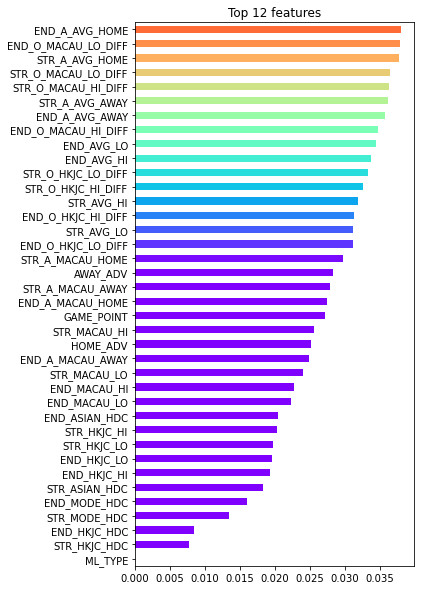

In [19]:
# Get feature importances
rf = model2.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

n = 12
plt.figure(figsize=(5,10))
plt.title(f'Top {n} features')
importances.sort_values().plot.barh(color = iter(cm.rainbow(np.linspace(-1.1,1.5))));

In [20]:
model3 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    LogisticRegression(max_iter=300, random_state=42)
)

model3.fit(X_train, y_train)

print('Training Accuracy:', model3.score(X_train, y_train))
print('Validation Accuracy:', model3.score(X_val, y_val))
print('Test Accuracy:', model3.score(X_test, y_test))


Training Accuracy: 0.5886337975159955
Validation Accuracy: 0.5803480040941658
Test Accuracy: 0.5858778625954199


C:\Users\willi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
#remove negative features
X_train = X_train[['END_ASIAN_HDC','END_O_HKJC_HI_DIFF','HOME_ADV','STR_A_AVG_AWAY','STR_AVG_HI','END_O_MACAU_HI_DIFF','END_HKJC_HI','STR_AVG_LO','END_A_AVG_HOME','END_O_HKJC_LO_DIFF']]
X_val = X_val[['END_ASIAN_HDC','END_O_HKJC_HI_DIFF','HOME_ADV','STR_A_AVG_AWAY','STR_AVG_HI','END_O_MACAU_HI_DIFF','END_HKJC_HI','STR_AVG_LO','END_A_AVG_HOME','END_O_HKJC_LO_DIFF']]
X_test = X_test[['END_ASIAN_HDC','END_O_HKJC_HI_DIFF','HOME_ADV','STR_A_AVG_AWAY','STR_AVG_HI','END_O_MACAU_HI_DIFF','END_HKJC_HI','STR_AVG_LO','END_A_AVG_HOME','END_O_HKJC_LO_DIFF']]

In [22]:
from xgboost import XGBClassifier
model1 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier(n_estimators=12, random_state=42, n_jobs=-1, learning_rate=0.097, subsample=1)
)

model1.fit(X_train, y_train)

print('Training Accuracy:', model1.score(X_train, y_train))
print('Validation Accuracy:', model1.score(X_val, y_val))
print('Test Accuracy:', model1.score(X_test, y_test))


Training Accuracy: 0.7339104252916824
Validation Accuracy: 0.5465711361310133
Test Accuracy: 0.5629770992366412


In [23]:
model2 = Pipeline([
                  ('oe', ce.OrdinalEncoder()),
                  ('impute', SimpleImputer(strategy='mean')),
                  ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

model2.fit(X_train, y_train)

print('training accuracy:', model2.score(X_train, y_train))
print('validation accuracy:', model2.score(X_val, y_val))
print('test accuracy:', model2.score(X_test, y_test))

training accuracy: 1.0
validation accuracy: 0.5363357215967247
test accuracy: 0.5076335877862596


In [24]:
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [25]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

PermutationImportance(estimator=RandomForestClassifier(n_jobs=-1,
                                                       random_state=42),
                      random_state=42, scoring='accuracy')

In [26]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=X_test.columns.tolist()
)

Weight,Feature
0.0227 ± 0.0291,HOME_ADV
0.0199 ± 0.0097,END_O_MACAU_HI_DIFF
0.0182 ± 0.0207,END_O_HKJC_HI_DIFF
0.0160 ± 0.0266,END_A_AVG_HOME
0.0158 ± 0.0152,STR_A_AVG_AWAY
0.0154 ± 0.0279,END_HKJC_HI
0.0070 ± 0.0209,END_ASIAN_HDC
0.0008 ± 0.0105,END_O_HKJC_LO_DIFF
-0.0018 ± 0.0189,STR_AVG_LO
-0.0029 ± 0.0077,STR_AVG_HI


In [27]:
model3 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    LogisticRegression(random_state=42)
)

model3.fit(X_train, y_train)

print('Training Accuracy:', model3.score(X_train, y_train))
print('Validation Accuracy:', model3.score(X_val, y_val))
print('Test Accuracy:', model3.score(X_test, y_test))


Training Accuracy: 0.5468573579224689
Validation Accuracy: 0.5609007164790174
Test Accuracy: 0.5400763358778626


In [28]:
import matplotlib.pyplot as plt


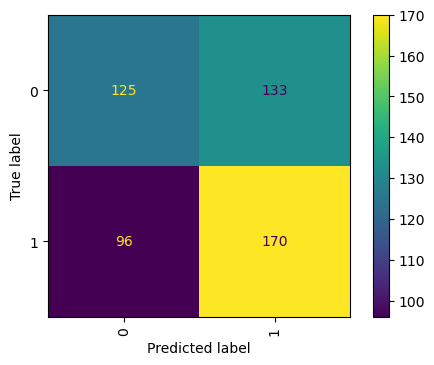

In [29]:
#Confusion graph
from sklearn.metrics import plot_confusion_matrix, classification_report

plt.rcParams['figure.dpi'] = 100
plot_confusion_matrix(model1, X_test, y_test, values_format='.0f', xticks_rotation='vertical')

In [30]:
# df1.tail()

In [31]:
final = df[['MATCH_ID','MATCH_DATETIME', 'ML_TYPE', 'HOME_TEAM', 'AWAY_TEAM', 'HOME_FT_GOAL', 'AWAY_FT_GOAL', 'END_MODE_HDC', 'END_MACAU_HI', 'END_MACAU_LO', 'END_HKJC_HDC', 'END_HKJC_HI', 'END_HKJC_LO', 'TOTAL_GOAL_COUNT', ou_hdc]]

final = final.query('ML_TYPE == "TEST"')

In [32]:
y_pred = model1.predict(X_test)
class_probabilities = model1.predict_proba(X_test)

pred = pd.DataFrame(y_pred, columns=['pred'])
prob = pd.DataFrame(class_probabilities, columns=['prob0','prob1' ])

final.reset_index(drop=True, inplace=True)
pred.reset_index(drop=True, inplace=True)
prob.reset_index(drop=True, inplace=True)

fin = pd.concat([final, prob, pred], axis=1)


In [33]:
# for i,j in fin.iterrows():
#     if fin.loc[i, 'prob0'] >= 0.6:
#         print(fin.loc[[i]])
#         print('%s	%s	%s	%s	%s	%s	%s	%s	%s	%s	%s	%s	%s' % (fin.loc[i, 'MATCH_DATETIME'],fin.loc[i, 'HOME_TEAM'],fin.loc[i, 'AWAY_TEAM'],fin.loc[i, 'HOME_FT_GOAL'],fin.loc[i, 'AWAY_FT_GOAL'],fin.loc[i, 'STR_HKJC_HILO_HANDICAP'],fin.loc[i, 'STR_HKJC_HILO_HI'],fin.loc[i, 'STR_HKJC_HILO_LO'],fin.loc[i, 'TOTAL_GOAL_COUNT'],fin.loc[i, 'OU25'],fin.loc[i, 'prob0'],fin.loc[i, 'prob1'],fin.loc[i, 'pred']))

In [34]:
fin['Correct'] = (fin[ou_hdc] == fin['pred']).astype(int)


In [35]:
#def a(fin):
#    if (fin['prob0'] >= 0.55 or fin['prob1'] >= 0.55):
#        return 1
#    else:
#      return 0
#fin = fin.assign(O55=fin.apply(a, axis=1))

In [36]:
hdc_col = 'END_MODE_HDC'
hi_col = 'END_MACAU_HI'
lo_col = 'END_MACAU_LO'
hkjc_hdc = 2.5

In [37]:
#betting on every single match
money = []
count = 0 

for i,j in fin.iterrows():
    if fin.loc[i, hdc_col] == hkjc_hdc:
      if fin.loc[i, 'Correct'] == 1:
          if fin.loc[i, ou_hdc] == 1:
            count = (count + (100*fin.loc[i, hi_col]))
            money.append(count)
          elif fin.loc[i, ou_hdc] == 0:
            count = (count + (100*fin.loc[i, lo_col]))
            money.append(count)
      else:
        count = count - 100
        money.append(count)
    
fin.loc[:, 'Model1'] = pd.Series(money)

In [38]:
#betting on every over (baseline)
money = []
count = 0 

for i,j in fin.iterrows():
  if fin.loc[i, hdc_col] == hkjc_hdc:
    if fin.loc[i, ou_hdc] == 1:
        count = (count + (100*fin.loc[i, hi_col]))
        money.append(count)
    else:
      count = count - 100
      money.append(count)
    
fin.loc[:, 'Baseline'] = pd.Series(money)

In [39]:
fin[ou_hdc].value_counts(normalize=True)

1    0.507634
0    0.492366
Name: OU25, dtype: float64

In [40]:
# fin

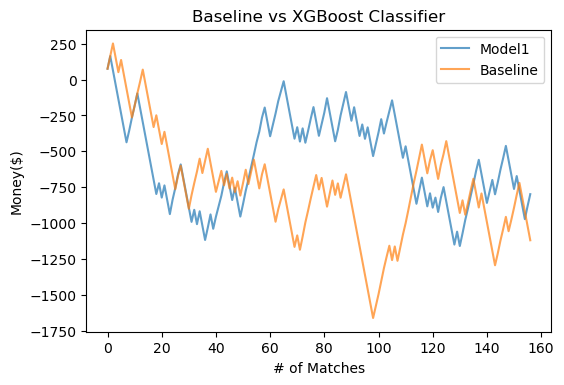

In [41]:
fin.plot(y=["Model1", "Baseline"], alpha=0.7)
plt.title('Baseline vs XGBoost Classifier')
plt.xlabel('# of Matches')
plt.ylabel('Money($)')

plt.show()

In [42]:
fin = fin.drop(['Model1','Baseline'], axis=1)

In [43]:
#betting on only 55% Confidence 
money = []
count = 0 
prob = 0.55

for i,j in fin.iterrows():
  if fin.loc[i, 'prob0'] >= prob or fin.loc[i, 'prob1'] >= prob:
    if ou_hdc == 'OU35':
      if fin.loc[i, hdc_col] >= hkjc_hdc and fin.loc[i, 'pred'] == 1:
        if fin.loc[i, 'Correct'] == 1:
          if fin.loc[i, ou_hdc] == 1:
            count = (count + (100*fin.loc[i, hi_col]))
            money.append(count)
          elif fin.loc[i, ou_hdc] == 0:
            count = (count + (100*fin.loc[i, lo_col]))
            money.append(count)
        else:
          count = count - 100
          money.append(count)
      else:
        money.append(count)
    else:
        if fin.loc[i, 'Correct'] == 1:
          if fin.loc[i, ou_hdc] == 1:
            count = (count + (100*fin.loc[i, hi_col]))
            money.append(count)
          elif fin.loc[i, ou_hdc] == 0:
            count = (count + (100*fin.loc[i, lo_col]))
            money.append(count)
        else:
          count = count - 100
          money.append(count)
  else:
    money.append(count)
    
fin.loc[:, 'PL 0.55'] = pd.Series(money)

In [44]:
#betting on only 60% Confidence 
money = []
count = 0 
prob = 0.6

for i,j in fin.iterrows():
  if fin.loc[i, 'prob0'] >= prob or fin.loc[i, 'prob1'] >= prob:
    if ou_hdc == 'OU35':
      if fin.loc[i, hdc_col] >= hkjc_hdc and fin.loc[i, 'pred'] == 1:
        if fin.loc[i, 'Correct'] == 1:
          if fin.loc[i, ou_hdc] == 1:
            count = (count + (100*fin.loc[i, hi_col]))
            money.append(count)
          elif fin.loc[i, ou_hdc] == 0:
            count = (count + (100*fin.loc[i, lo_col]))
            money.append(count)
        else:
          count = count - 100
          money.append(count)
      else:
        money.append(count)
    else:
        if fin.loc[i, 'Correct'] == 1:
          if fin.loc[i, ou_hdc] == 1:
            count = (count + (100*fin.loc[i, hi_col]))
            money.append(count)
          elif fin.loc[i, ou_hdc] == 0:
            count = (count + (100*fin.loc[i, lo_col]))
            money.append(count)
        else:
          count = count - 100
          money.append(count)
  else:
    money.append(count)
    
fin.loc[:, 'PL 0.6'] = pd.Series(money)

In [45]:
#betting on only 65% Confidence 
money = []
count = 0 
prob = 0.65

for i,j in fin.iterrows():
  if fin.loc[i, 'prob0'] >= prob or fin.loc[i, 'prob1'] >= prob:
    if ou_hdc == 'OU35':
      if fin.loc[i, hdc_col] >= hkjc_hdc and fin.loc[i, 'pred'] == 1:
        if fin.loc[i, 'Correct'] == 1:
          if fin.loc[i, ou_hdc] == 1:
            count = (count + (100*fin.loc[i, hi_col]))
            money.append(count)
          elif fin.loc[i, ou_hdc] == 0:
            count = (count + (100*fin.loc[i, lo_col]))
            money.append(count)
        else:
          count = count - 100
          money.append(count)
      else:
        money.append(count)
    else:
        if fin.loc[i, 'Correct'] == 1:
          if fin.loc[i, ou_hdc] == 1:
            count = (count + (100*fin.loc[i, hi_col]))
            money.append(count)
          elif fin.loc[i, ou_hdc] == 0:
            count = (count + (100*fin.loc[i, lo_col]))
            money.append(count)
        else:
          count = count - 100
          money.append(count)
  else:
    money.append(count)
    
fin.loc[:, 'PL 0.65'] = pd.Series(money)

In [46]:
#betting on only 70% Confidence 
money = []
count = 0 
prob = 0.7

for i,j in fin.iterrows():
  if fin.loc[i, 'prob0'] >= prob or fin.loc[i, 'prob1'] >= prob:
    if ou_hdc == 'OU35':
      if fin.loc[i, hdc_col] >= hkjc_hdc and fin.loc[i, 'pred'] == 1:
        if fin.loc[i, 'Correct'] == 1:
          if fin.loc[i, ou_hdc] == 1:
            count = (count + (100*fin.loc[i, hi_col]))
            money.append(count)
          elif fin.loc[i, ou_hdc] == 0:
            count = (count + (100*fin.loc[i, lo_col]))
            money.append(count)
        else:
          count = count - 100
          money.append(count)
      else:
        money.append(count)
    else:
        if fin.loc[i, 'Correct'] == 1:
          if fin.loc[i, ou_hdc] == 1:
            count = (count + (100*fin.loc[i, hi_col]))
            money.append(count)
          elif fin.loc[i, ou_hdc] == 0:
            count = (count + (100*fin.loc[i, lo_col]))
            money.append(count)
        else:
          count = count - 100
          money.append(count)
  else:
    money.append(count)
    
fin.loc[:, 'PL 0.7'] = pd.Series(money)

In [47]:
# Match date prediction
from datetime import datetime, timedelta, date, time
current_match_date = datetime.now()
current_time = datetime.now().time()
if current_time >= time(0,0) and current_time <= time(11, 30):
    previous_day = current_match_date - timedelta(days=1)
    current_match_date = previous_day
current_match_date = current_match_date.strftime("%Y-%m-%d 11:30:00")

print('MATCH_DATETIME > \'%s\'' % current_match_date)
fin.query('MATCH_DATETIME > \'%s\'' % current_match_date)

# finq.tail(20)
# fin.tail(5)
fin

MATCH_DATETIME > '2020-09-25 11:30:00'


,MATCH_ID,MATCH_DATETIME,ML_TYPE,HOME_TEAM,AWAY_TEAM,HOME_FT_GOAL,AWAY_FT_GOAL,END_MODE_HDC,END_MACAU_HI,END_MACAU_LO,END_HKJC_HDC,END_HKJC_HI,END_HKJC_LO,TOTAL_GOAL_COUNT,OU25,prob0,prob1,pred,Correct,PL 0.55,PL 0.6,PL 0.65,PL 0.7
0,1884677,2020-09-01 02:00:00,TEST,迪加史卓普,丹博斯治,4.0,2.0,3.50,0.58,1.02,3.5,0.75,0.95,6.0,1,0.369273,0.630727,1,1,58.0,58.0,0.0,0
1,1880418,2020-09-01 10:05:00,TEST,萊昂,阿特拿斯,2.0,1.0,2.50,0.75,0.90,2.5,0.70,1.02,3.0,1,0.414193,0.585807,1,1,133.0,58.0,0.0,0
2,1912952,2020-09-02 00:30:00,TEST,AFC溫布頓(中),查爾頓,2.0,1.0,2.75,0.88,0.72,2.5,0.70,1.02,3.0,1,0.414491,0.585509,1,1,221.0,58.0,0.0,0
3,1912953,2020-09-02 02:00:00,TEST,卡素爾,費列活特,1.0,3.0,2.50,0.88,0.72,2.5,0.72,1.00,4.0,1,0.461058,0.538942,1,1,221.0,58.0,0.0,0
4,1908517,2020-09-02 08:00:00,TEST,多倫多FC,蒙特利爾衝擊,0.0,1.0,3.00,0.86,0.84,2.5,0.52,1.35,1.0,0,0.466306,0.533694,1,0,221.0,58.0,0.0,0
5,1873067,2020-09-02 18:00:00,TEST,櫪木SC,北九州向日葵,2.0,2.0,2.00,0.94,0.76,2.5,1.50,0.46,4.0,1,0.536572,0.463428,0,0,221.0,58.0,0.0,0
6,1873059,2020-09-02 18:00:00,TEST,千葉市原,福岡黃蜂,2.0,2.0,2.25,0.91,0.79,2.5,1.30,0.54,4.0,1,0.432561,0.567439,1,1,312.0,58.0,0.0,0
7,1908522,2020-09-02 18:00:00,TEST,大阪櫻花,柏雷素爾,0.0,3.0,2.50,0.88,0.82,2.5,0.85,0.85,3.0,1,0.572700,0.427300,0,0,212.0,58.0,0.0,0
8,1908523,2020-09-02 18:00:00,TEST,FC東京,名古屋八鯨,3.0,0.0,2.25,0.90,0.80,2.5,0.90,0.80,3.0,1,0.549298,0.450702,0,0,212.0,58.0,0.0,0
9,1873063,2020-09-02 18:00:00,TEST,岡山綠雉,松本山雅,1.0,0.0,2.00,0.80,0.90,2.5,1.45,0.48,1.0,0,0.537002,0.462998,0,1,212.0,58.0,0.0,0


In [48]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    StandardScaler(), 
    RandomForestClassifier(random_state=42, n_jobs=-1)
)

param_distributions = {
    'randomforestclassifier__n_estimators':[20,50,100,200],
    'randomforestclassifier__criterion':['gini', 'entropy'],
    'randomforestclassifier__max_features':[0.25,3,5],
    'randomforestclassifier__min_samples_split':[3,5,15],
    'randomforestclassifier__min_samples_leaf':[2,5],
}

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=10, 
    cv=5, 
    scoring='accuracy', 
    verbose=1, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, y_train);


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.8s finished


In [49]:
print('Cross-validation Best Score:', search.best_score_)
print('Best Estimator:', search.best_params_)
print('Best Model:', search.best_estimator_)

Cross-validation Best Score: 0.5329234102204664
Best Estimator: {'randomforestclassifier__n_estimators': 20, 'randomforestclassifier__min_samples_split': 3, 'randomforestclassifier__min_samples_leaf': 5, 'randomforestclassifier__max_features': 0.25, 'randomforestclassifier__criterion': 'entropy'}
Best Model: Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_features=0.25,
                                        min_samples_leaf=5, min_samples_split=3,
                                        n_estimators=20, n_jobs=-1,
                                        random_state=42))])
